# Random Forest Decision Trees

- Have the ability to greatly increase the performance of decision trees based on expanding ideas.
- they are known as ensemble learners since they rely on a set of models (multiple decision trees).
- it creates subsets of randomly picked features at each potential split.
        this simply means that at each stage of the tree we are picking from a different radnom subset of n features,  this ensures we get coverage of all the relevant features and not just some.
- this allows the creation of an ensemble of many different decision trees to cover all useful features
- so a question qill go through the forest (ensemble of differently built decision trees) and a score will come back for each tree depicting the prediciton, these sets of predicitons then form a percentage (e.g. 66% chance it is this class)
- In regression for continuous feature predictions however, it will take an average.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Important random forest hyper params are

## 1. number of estimators. (how many trees to use total in the forest)
"Ranom forests cannot overfit"

- default value is 100
- we can cross validate with number of trees (use grid search)
- can plot error vs number of trees
- we have a certain point where we get diminishing returns but it will never over fit where error will increase.

## 2. number of features. (how many features to include in the random subsets)
The current convention is to start off by chosing sqrt of n as the number to include in each split but n/3 may be better for regression tasks. We of course do a grid search to find the best value.


## 3. bootstrap samples.
bootstrapping: random sampling with replacement. this lets us select also a random subset of rows for each split meaning we are choosing two random components, features and rows!
- the reason is to have a new hyper paramater to reduce correlation between trees.

## 4. out of bag error (OOB).
out of bag are the results that were NOT selected for bootstrapping, we can now test the tree on the "out of bag" rows to calculate a test metric.
- The hyper param does not affect the training process.
- default is false.


In [3]:
df = pd.read_csv('../DATA/penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df = df.dropna()

In [6]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
raw_X = df.drop('species', axis=1)
X = pd.get_dummies(raw_X, drop_first=True)

In [9]:
y = df['species']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
# RANDOM FOREST IMPORT FROM ENSEMBLE
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [15]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [16]:
preds = rfc.predict(X_test)

In [17]:
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'A

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

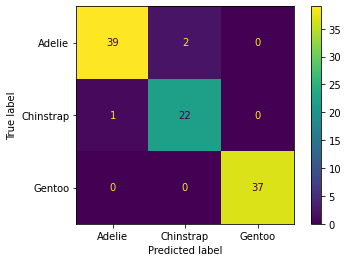

In [19]:
plot_confusion_matrix(rfc, X_test, y_test)

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [22]:
# All this time were consisered!
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

# Grid search and cross validation

In [23]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')

In [24]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


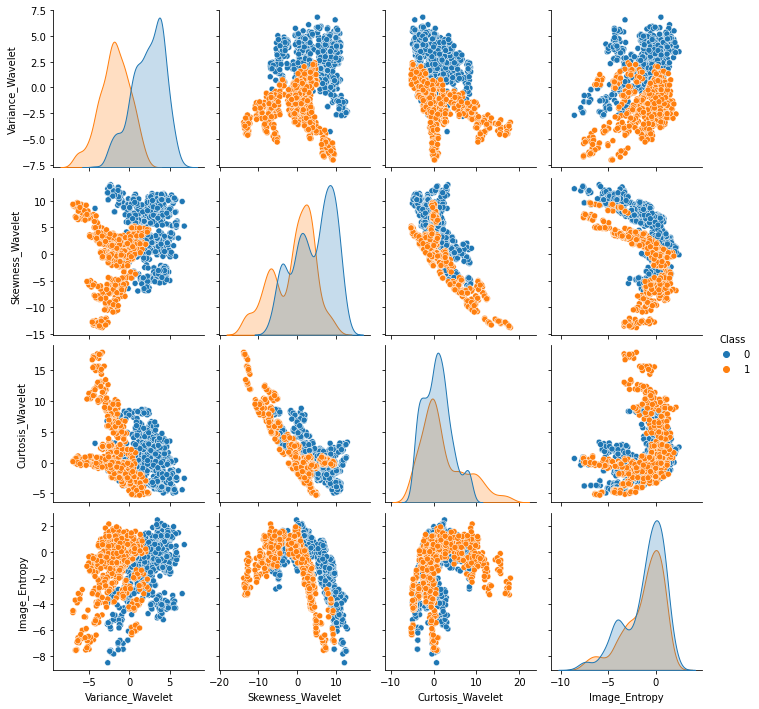

In [26]:
sns.pairplot(df, hue='Class')

In [28]:
X = df.drop('Class', axis=1)
y = df['Class']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootsrap = [True, False]
# OOB only possible when bootrap = true, we will get warnings for this!
oob_score = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootsrap,
    'oob_score': oob_score
}

In [34]:
rfc = RandomForestClassifier()

In [35]:
grid = GridSearchCV(rfc, param_grid)

In [36]:
grid.fit(X_train, y_train)

C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\

C:\Users\Alessandro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.99314038 0.99399875 0.99399875 0.99485712 0.99485712 0.99399875
 0.99399875 0.99485345 0.99142365 0.99142365 0.99228201 0.99314038
 0.99228201 0.99314038 0.99399875 0.99314038 0.9871318  0.98799017
 0.98799017 0.98884854 0.98799017 0.9871318  0.98799017 0.98884854
        nan 0.99313672        nan 0.99399142        nan 0.99313672
        nan 0.99313672        nan 0.99142365        nan 0.99228201
        nan 0.99227835        nan 0.99056528        nan 0.98112688
        nan 0.97855545        nan 0.97770441        nan 0.97684604]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [37]:
grid.best_params_ # Remember oob does nopt affect training so you can find that param as irrelevant

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [38]:
# So we need to now create it manualy...
rfc = RandomForestClassifier(max_features=2, n_estimators=100, oob_score=True)

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [41]:
# Wow very good!
rfc.oob_score_ # Bonus test score...

0.9948542024013722

In [42]:
preds = rfc.predict(X_test)

In [46]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [44]:
# Wow very effective!
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



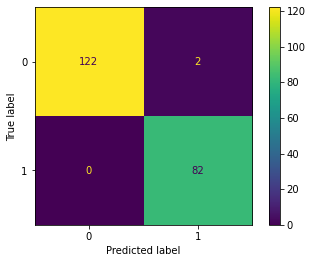

In [45]:
plot_confusion_matrix(rfc, X_test, y_test)

In [47]:
errors = []
missclassifications = []

for n in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train, y_train)
    t_preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, t_preds)
    # Get total of all preds missed
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    missclassifications.append(n_missed)

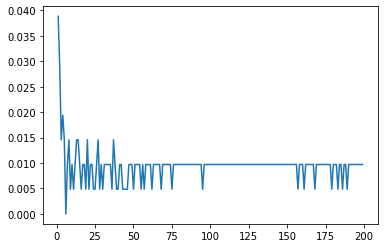

In [48]:
plt.plot(range(1, 200), errors)

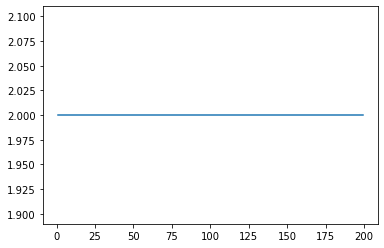

In [49]:
plt.plot(range(1, 200), missclassifications)